# НИР. Множественное выравнивание границ экзон-интрон и интрон-экзон

## 1. Поиск границ экзон-интрон и интрон-экзон

In [1]:
import os
import re

#### Загрузка хромосомы и выделение регионов:

In [2]:
path = 'C:/Users/kshch/Projects/УИР/src/data'

In [3]:
# Homo_sapiens.GRCh38.dna.chromosome.1.fa

os.chdir(r"{}".format(path))
files = os.listdir()
files

['borders',
 'Homo_sapiens.GRCh38.107.chromosome.1.gff3',
 'Homo_sapiens.GRCh38.dna.chromosome.1.fa',
 'methods',
 'searching']

In [4]:
with open('Homo_sapiens.GRCh38.107.chromosome.1.gff3', 'r') as file:
    regions = ''.join(file.readlines()).split('###\n')[1:]

#### Выделение среди регионов участков ген:

In [5]:
genes = []

for region in regions:
    if '\tgene\t' in region:
        genes.append(region)

In [6]:
len(genes)

2097

#### Выделение мРНК, кодирующих белок:

In [7]:
mRNA_list = []

for gen in genes:
    i_mRNAs = re.split('\\n.+mRNA', gen)[1:]
    
    if len(i_mRNAs) > 1:
        mRNA_list += i_mRNAs

In [8]:
mRNA_list_new = []

for i in range(len(mRNA_list)):
    if 'protein_coding' in mRNA_list[i].split('\n')[0]:
        mRNA_list[i] = '\n'.join(mRNA_list[i].split('\n')[1:])
        mRNA_list_new.append(mRNA_list[i])

In [9]:
mRNA_list = mRNA_list_new

#### Поиск иных участков:

In [10]:
len(mRNA_list)

7581

In [11]:
names = set()

for mRNA in mRNA_list:
    lines = mRNA.split('\n')
    
    for line in lines:
        if line != '':
            names.add(line.split('\t')[2])

In [12]:
names

{'CDS',
 'exon',
 'five_prime_UTR',
 'lnc_RNA',
 'three_prime_UTR',
 'unconfirmed_transcript'}

In [13]:
for i in range(len(mRNA_list)):
    mRNA_list[i] = re.sub('(\\n.+lnc_RNA(.|\s)*|\\n.+unconfirmed_transcript(.|\s)*)', '', mRNA_list[i], flags=0) 

In [14]:
len(mRNA_list)

7581

In [15]:
names = set()

for mRNA in mRNA_list:
    lines = mRNA.split('\n')
    
    for line in lines:
        if line != '':
            names.add(line.split('\t')[2])

In [16]:
names

{'CDS', 'exon', 'five_prime_UTR', 'three_prime_UTR'}

In [17]:
for RNA in mRNA_list[len(mRNA_list)-10:-1]:
    print(RNA)
    print('--'*50)

1	havana	exon	248838331	248838551	.	+	.	Parent=transcript:ENST00000505503;Name=ENSE00002078743;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00002078743;rank=1;version=1
1	havana	five_prime_UTR	248838331	248838551	.	+	.	Parent=transcript:ENST00000505503
1	havana	exon	248844483	248844636	.	+	.	Parent=transcript:ENST00000505503;Name=ENSE00001169686;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00001169686;rank=2;version=1
1	havana	five_prime_UTR	248844483	248844636	.	+	.	Parent=transcript:ENST00000505503
1	havana	exon	248845566	248845662	.	+	.	Parent=transcript:ENST00000505503;Name=ENSE00001169681;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00001169681;rank=3;version=1
1	havana	five_prime_UTR	248845566	248845662	.	+	.	Parent=transcript:ENST00000505503
1	havana	five_prime_UTR	248847175	248847274	.	+	.	Parent=transcript:ENST00000505503
1	havana	exon	248847175	248847285	.	+	.	Parent=transcript:ENST00000505503;Name=ENSE00002082740;co

In [18]:
len(mRNA_list)

7581

#### Выбираем границы экзон-интрон и интрон-экзон:

In [19]:
print(mRNA_list[-3])

1	havana	exon	248857313	248857497	.	-	.	Parent=transcript:ENST00000496231;Name=ENSE00001931724;constitutive=0;ensembl_end_phase=0;ensembl_phase=1;exon_id=ENSE00001931724;rank=4;version=1
1	havana	CDS	248857313	248857497	.	-	2	ID=CDS:ENSP00000432300;Parent=transcript:ENST00000496231;protein_id=ENSP00000432300
1	havana	exon	248857828	248857859	.	-	.	Parent=transcript:ENST00000496231;Name=ENSE00003692227;constitutive=0;ensembl_end_phase=1;ensembl_phase=2;exon_id=ENSE00003692227;rank=3;version=1
1	havana	CDS	248857828	248857859	.	-	1	ID=CDS:ENSP00000432300;Parent=transcript:ENST00000496231;protein_id=ENSP00000432300
1	havana	CDS	248858131	248858309	.	-	0	ID=CDS:ENSP00000432300;Parent=transcript:ENST00000496231;protein_id=ENSP00000432300
1	havana	exon	248858131	248858419	.	-	.	Parent=transcript:ENST00000496231;Name=ENSE00001829590;constitutive=0;ensembl_end_phase=2;ensembl_phase=-1;exon_id=ENSE00001829590;rank=2;version=1
1	havana	five_prime_UTR	248858310	248858419	.	-	.	Parent=transcript:E

In [20]:
for i in range(len(mRNA_list)):
    symb = set()
    line = mRNA_list[i].split('\n')[0]
    symb.add(line.split('\t')[6])
    
    count_h = mRNA_list[i].count('five_prime_UTR')
    count_t = mRNA_list[i].count('three_prime_UTR')
    
    if '+' in symb:      
#         mRNA_list[i] = ''
        for j in range(count_h - 1):
            mRNA_list[i] = '\n'.join(mRNA_list[i].split('\n')[2:])
    
        for j in range(count_t - 1):
            mRNA_list[i] = '\n'.join(mRNA_list[i].split('\n')[:-2])
    elif '-' in symb:
#         mRNA_list[i] = ''
        for j in range(count_h - 1):
            mRNA_list[i] = '\n'.join(mRNA_list[i].split('\n')[:-2])
    
        for j in range(count_t - 1):
            mRNA_list[i] = '\n'.join(mRNA_list[i].split('\n')[2:])


In [21]:
print(mRNA_list[-3])

1	havana	exon	248857313	248857497	.	-	.	Parent=transcript:ENST00000496231;Name=ENSE00001931724;constitutive=0;ensembl_end_phase=0;ensembl_phase=1;exon_id=ENSE00001931724;rank=4;version=1
1	havana	CDS	248857313	248857497	.	-	2	ID=CDS:ENSP00000432300;Parent=transcript:ENST00000496231;protein_id=ENSP00000432300
1	havana	exon	248857828	248857859	.	-	.	Parent=transcript:ENST00000496231;Name=ENSE00003692227;constitutive=0;ensembl_end_phase=1;ensembl_phase=2;exon_id=ENSE00003692227;rank=3;version=1
1	havana	CDS	248857828	248857859	.	-	1	ID=CDS:ENSP00000432300;Parent=transcript:ENST00000496231;protein_id=ENSP00000432300
1	havana	CDS	248858131	248858309	.	-	0	ID=CDS:ENSP00000432300;Parent=transcript:ENST00000496231;protein_id=ENSP00000432300
1	havana	exon	248858131	248858419	.	-	.	Parent=transcript:ENST00000496231;Name=ENSE00001829590;constitutive=0;ensembl_end_phase=2;ensembl_phase=-1;exon_id=ENSE00001829590;rank=2;version=1
1	havana	five_prime_UTR	248858310	248858419	.	-	.	Parent=transcript:E

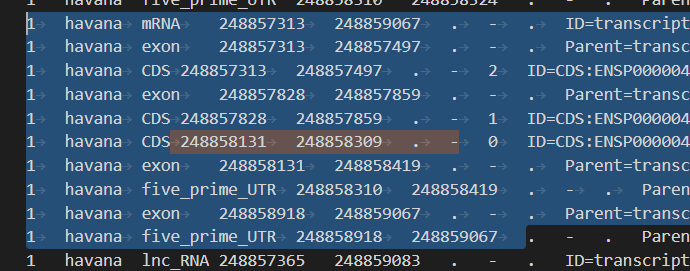

In [22]:
# for i in range(len(mRNA_list)):
#     lines = mRNA_list[i].split('\n')
    
#     count = mRNA_list[i].count('five_prime_UTR')
    
#     if count > 1:
#         for j in range(count - 1):
#             mRNA_list[i] = '\n'.join(mRNA_list[i].split('\n')[2:])

In [23]:
# for i in range(len(mRNA_list)):
#     count = mRNA_list[i].count('three_prime_UTR')
    
#     if count > 1:
#         for j in range(count - 1):
#             mRNA_list[i] = '\n'.join(mRNA_list[i].split('\n')[:-2])

In [24]:
for RNA in mRNA_list[10:20]:
    print(RNA)
    print('--'*50)

1	havana	exon	939275	939460	.	+	.	Parent=transcript:ENST00000455979;Name=ENSE00002715021;constitutive=0;ensembl_end_phase=1;ensembl_phase=1;exon_id=ENSE00002715021;rank=1;version=1
1	havana	CDS	939275	939460	.	+	2	ID=CDS:ENSP00000412228;Parent=transcript:ENST00000455979;protein_id=ENSP00000412228
1	havana	exon	941144	941306	.	+	.	Parent=transcript:ENST00000455979;Name=ENSE00003477353;constitutive=0;ensembl_end_phase=2;ensembl_phase=1;exon_id=ENSE00003477353;rank=2;version=1
1	havana	CDS	941144	941306	.	+	2	ID=CDS:ENSP00000412228;Parent=transcript:ENST00000455979;protein_id=ENSP00000412228
1	havana	exon	942136	942251	.	+	.	Parent=transcript:ENST00000455979;Name=ENSE00003913392;constitutive=0;ensembl_end_phase=1;ensembl_phase=2;exon_id=ENSE00003913392;rank=3;version=1
1	havana	CDS	942136	942251	.	+	1	ID=CDS:ENSP00000412228;Parent=transcript:ENST00000455979;protein_id=ENSP00000412228
1	havana	exon	942410	942488	.	+	.	Parent=transcript:ENST00000455979;Name=ENSE00003675531;constitutive=0;en

#### Получение кодирующих участков:

In [25]:
mRNA_list = list(filter(lambda item: item != '', mRNA_list))

In [26]:
print(mRNA_list[-3])

1	havana	exon	248857313	248857497	.	-	.	Parent=transcript:ENST00000496231;Name=ENSE00001931724;constitutive=0;ensembl_end_phase=0;ensembl_phase=1;exon_id=ENSE00001931724;rank=4;version=1
1	havana	CDS	248857313	248857497	.	-	2	ID=CDS:ENSP00000432300;Parent=transcript:ENST00000496231;protein_id=ENSP00000432300
1	havana	exon	248857828	248857859	.	-	.	Parent=transcript:ENST00000496231;Name=ENSE00003692227;constitutive=0;ensembl_end_phase=1;ensembl_phase=2;exon_id=ENSE00003692227;rank=3;version=1
1	havana	CDS	248857828	248857859	.	-	1	ID=CDS:ENSP00000432300;Parent=transcript:ENST00000496231;protein_id=ENSP00000432300
1	havana	CDS	248858131	248858309	.	-	0	ID=CDS:ENSP00000432300;Parent=transcript:ENST00000496231;protein_id=ENSP00000432300
1	havana	exon	248858131	248858419	.	-	.	Parent=transcript:ENST00000496231;Name=ENSE00001829590;constitutive=0;ensembl_end_phase=2;ensembl_phase=-1;exon_id=ENSE00001829590;rank=2;version=1
1	havana	five_prime_UTR	248858310	248858419	.	-	.	Parent=transcript:E

In [27]:
mRNAs_cds_list = []

for mRNA in mRNA_list:
    i_mRNA_cds = []
    
    lines = mRNA.split('\n')
    for line in lines:
        if '\tCDS\t' in line:
            values = line.split('\t')
            CDS = {'start': int(values[3]),
                  'end':    int(values[4])}
            i_mRNA_cds.append(CDS)
    
    mRNAs_cds_list.append(i_mRNA_cds)

In [28]:
mRNAs_cds_list[-3]

[{'start': 248857313, 'end': 248857497},
 {'start': 248857828, 'end': 248857859},
 {'start': 248858131, 'end': 248858309}]

In [29]:
# CDS_list = []

# for mRNA in mRNA_list:
#     mRNA = mRNA.split('\n')
#     for line in mRNA:
#         if '\tCDS\t' in line:
#             CDS_list.append(line)
# #             print(line)
# #             print("--"*50)

In [30]:
# for CDS in CDS_list[:3]:
#     print(CDS)
#     print("--"*50)

In [31]:
# CDS_d_list = []

# for CDS in CDS_list:
#     values   = CDS.split('\t')
#     cds_dict = {'start': int(values[3]),
#                 'end':   int(values[4])}
#     CDS_d_list.append(cds_dict)

In [32]:
# len(CDS_d_list)

#### Выделение границ:

In [33]:
with open('Homo_sapiens.GRCh38.dna.chromosome.1.fa', 'r') as file:
    lines = ''.join(''.join(file.readlines()[1:]).split('\n'))

len(lines)

248956422

In [34]:
# cds = mRNAs_cds_list[-3][0]
# index = cds['end'] - 1
# lines[index -1  : index  + 3]

In [35]:
# mRNAs_cds_list[-3]

In [36]:
# cds = mRNAs_cds_list[-3][1]
# index = cds['start'] - 1
# lines[index - 2 : index + 2]

In [37]:
# границы
exon_intron = []
intron_exon = []

for mRNA_cds in mRNAs_cds_list:    
    for cds in mRNA_cds[:-1]:
        index = cds['end'] - 1
        exon_intron.append(f"{lines[index - 49 : index + 51]} , {cds['end']}")

    for cds in mRNA_cds[1:]:
        index = cds['start'] -1
        intron_exon.append(f"{lines[index - 50 : index + 50]} , {cds['start']}")

In [38]:
intron_exon

['CGCAGAAGCGTGCCGCTCCCTCACAGGGTCTGCCTCGGCTCTGCTCGCAGGGAAAAGTCTGAAGACGCTTATGTCCAAGGGGATCCTGCAGGTGCATCCT , 925922',
 'CCCACCTTCCTCTCCTCCTGCCCCACCTTCCTCTCCTCCTGCCCCACCAGAACCGGGGGCGGCTGGCAGACAAGAGGACAGTCGCCCTGCCTGCCGCCCG , 930155',
 'GGGTCAGGGGCCTCCAGAGCAACATGGACCTTCTGCTTCCCTTCCTGCAGAGTCCACACCCACTGGGACGTGAACATCTCTTTCCGAGAGGCGTCCTGCA , 931039',
 'CAGCCTCGCAGCTGCCCACGGGGTCAGCTTTTCCCGGTCTCGTTCTGCAGCCAGGACGGCAACCTTCCCACCCTCATATCCAGCGTCCACCGCAGCCGCC , 935772',
 'TCCCCTTCCATTCCTTGAGATGCAGGTGGGCACTCACTACCCTCCCGCAGGTGACCTGTTGGGCAAGAGGCTGGGCCGCTCCCCCCGTATCAGCAGCGAC , 939040',
 'GTCCTCGGCAGTGCCTGGAGAAACCTCTCACCCCGGGTCCTCCCCAGCAGAGGCGCTGCTGCTGCCGCGGGAGCTGGGGCCCAGCATGGCCCCGGAGGAC , 939275',
 'AGGATGAGGGCGCATAGCCGGGGGGATCACTGCTGTTGTCCCCCACCCAGATCTCCTGAGGGTCCGGCAGGAGGTGGCGGCTGCAGCTCTGAGGGGCCCC , 941144',
 'TACGGGAACGGGGGCGGGGGGGACGCCGCTCATTGCGCTGCCGTCCACAGGGAGCTGCCTCAGCCGCCCCCCTTGCTGTCGCCGCAGAATGCCCCTCACG , 942136',
 'CTCGGACCGCCTCGGACCCCCCGACCCCGCGTTGTCCCCCTCCCCACCAGGCTACGGCTTCCTGCCCCCCGCGCAGGCGGAGATGT

In [39]:
exon_intron

['CAGCGGCCGCGAGACGGCCAAGGACTGGAAGCGCAGCATCCGCCACAAAGGTGCCGCCGCCCCTCCCTTCGCTGCCGGGACCCGCGGGCCCCGACCCCAC , 924948',
 'TGCATCCTCCGATCTGCGACTGCCCGGGCTGCCGAATATCCTCCCCGGTGGTGAGATGCGGGGCTCGGTTGGGGCTGGGAGTTACTCTCCCCTGCGGAGC , 926013',
 'CCAGGCTTGAAGCAGGAGGATGGTCCGCACATCCGTATCATGAAGAGAAGGTACTTGGACCAGGGCCGGACAGGAAGGCGCAAGGCTCAGATGGGGCTGG , 930336',
 'GTCCACACCCACTGGGACGTGAACATCTCTTTCCGAGAGGCGTCCTGCAGGTAGGAGCCGTGCTGTGCGTGCATAAGAGGGGGCCGTGACTCCCCTCCCT , 931089',
 'CCGCTGTGAATTCCAGAGAGGCAGCCTGGAGATTGGCCTGCGACCCGCCGGTGAGGAGCACAGGGGGCCTGAGGGCGGGGTCGGGGCTGTGGGGCCAGAG , 935896',
 'CAGCAGCGACTGCTTTTCAGAGAAGAGGGCACGAAGCGAATCGCCTCAAGGTAAGAGCGTGGCTGGGACGAGAGACAGGTCACCAGGGGAGGGGGCAGTC , 939129',
 'CACCTTTGAGGACCCTCAGCGCCTCTACCACCTGGGCCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGATCCCCCTCATCACCTCCCCAGCCACGGT , 939412',
 'CAGCACCGGGAGGGCGCCGCCCCAGCTGCCGCCCCGTCCTTCTCGGAGAGGTACTGGGGTGGCTGCCGTTCTCTGCTTGTTTCTGGGGTGCCGCCCGCAC , 941306',
 'TCTCAGGCCCCCCTTCCTGGGGGTGCCCTCGGCTCTGTGCCAGACCCCAGGTGAGGAGGCGGGTGCGCATCCCCTGGGAGCCCGCG

In [40]:
len(intron_exon)

63503

In [41]:
len(intron_exon)

63503

In [42]:
len(exon_intron)

63503

In [43]:
len(exon_intron)

63503

#### Сохранение в файл:

In [44]:
path

'C:/Users/kshch/Projects/УИР/src/data'

In [45]:
with open(path + f'/borders/exon_intron.fasta', 'a') as file:
    for i in range(len(exon_intron)):
        file.write(f'>{i}\n')
        file.write(exon_intron[i] + '\n\n')

with open(path + f'/borders/intron_exon.fasta', 'a') as file:
    for i in range(len(intron_exon)):
        file.write(f'>{i}\n')
        file.write(intron_exon[i] + '\n\n')

#### Получение выборки

In [46]:
import random

In [47]:
exon_intron_rdm = []
intron_exon_rdm = []
data_size = 100


for i in range(data_size):
    exon_intron_rdm.append(random.choice(exon_intron))
    intron_exon_rdm.append(random.choice(intron_exon))

In [48]:
# exon_intron = '\n\n'.join(exon_intron)
# intron_exon = '\n\n'.join(intron_exon)

with open(path + f'/borders/exon_intron_{data_size}.fasta', 'a') as file:
    for i in range(len(exon_intron_rdm)):
        file.write(f'>{i}\n')
        file.write(exon_intron_rdm[i] + '\n\n')

with open(path + f'/borders/intron_exon_{data_size}.fasta', 'a') as file:
    for i in range(len(intron_exon_rdm)):
        file.write(f'>{i}\n')
        file.write(intron_exon_rdm[i] + '\n\n')